# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from nltk.stem import WordNetLemmatizer 
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en")

btc_news["totalResults"]

7229

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")

eth_news["totalResults"]

2447

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for x in btc_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text) 
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(btc_sentiment)

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for x in eth_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text) 
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(eth_sentiment)

In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.059435,0.060900,0.046450,0.892650
std,0.471962,0.060969,0.083549,0.093352
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.307000,0.000000,0.000000,0.853250
50%,0.000000,0.056000,0.000000,0.910500
75%,0.467575,0.100000,0.076250,0.954250
max,0.726400,0.178000,0.287000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.174515,0.056050,0.01345,0.93050
std,0.312339,0.073898,0.02766,0.08117
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84275
50%,0.000000,0.000000,0.00000,0.96950
75%,0.402575,0.129500,0.00000,1.00000
max,0.726400,0.190000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with score of .060900

Q: Which coin had the highest compound score?

A: Bitcoin and Ethereum both had a maxe compound score of .726400 

Q. Which coin had the highest positive score?

A: Ethereum with score of .190000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addon = {"."}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z\.]")
    article_clean = regex.sub(" ", text)
   
    # Create a tokenized list of the words
    words = word_tokenize(article_clean)
    
    # Lemmatize words into root words
    lem_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lc_words = [x.lower() for x in words if x.lower() not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem_words if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
tokenized_btc = []
for text in btc_sentiment_df['Text']:
    tokens = tokenizer(text)
    tokenized_btc.append(tokens)
btc_sentiment_df['tokens'] = tokenized_btc
btc_sentiment_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,tokens
0,When my wife started a little garden in our ur...,2021-08-06,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.4939,0.127,0.000,0.873,"[longtime, techcrunch, reader, know, well, mic..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
tokenized_eth = []
for text in eth_sentiment_df['Text']:
    tokens = tokenizer(text)
    tokenized_eth.append(tokens)
eth_sentiment_df['tokens'] = tokenized_eth
eth_sentiment_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,tokens
0,There are many blockchain platforms competing ...,2021-07-16,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,2021-07-29,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.6956,0.190,0.000,0.810,"[cent, wa, founded, ad, free, creator, network..."
4,Representation of the Ethereum virtual currenc...,2021-08-05,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

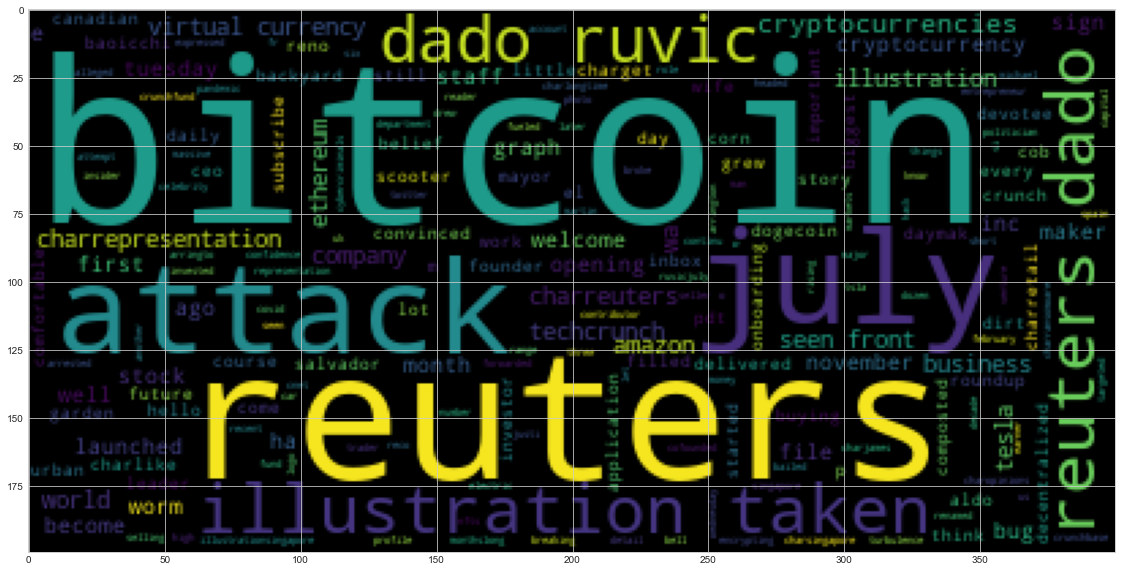

In [20]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE
tokenized_btc_list = []
for btc_tokens in btc_sentiment_df['tokens']:
    tokenized_btc_list.append(" ".join(btc_tokens))
text = ""
for i in tokenized_btc_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

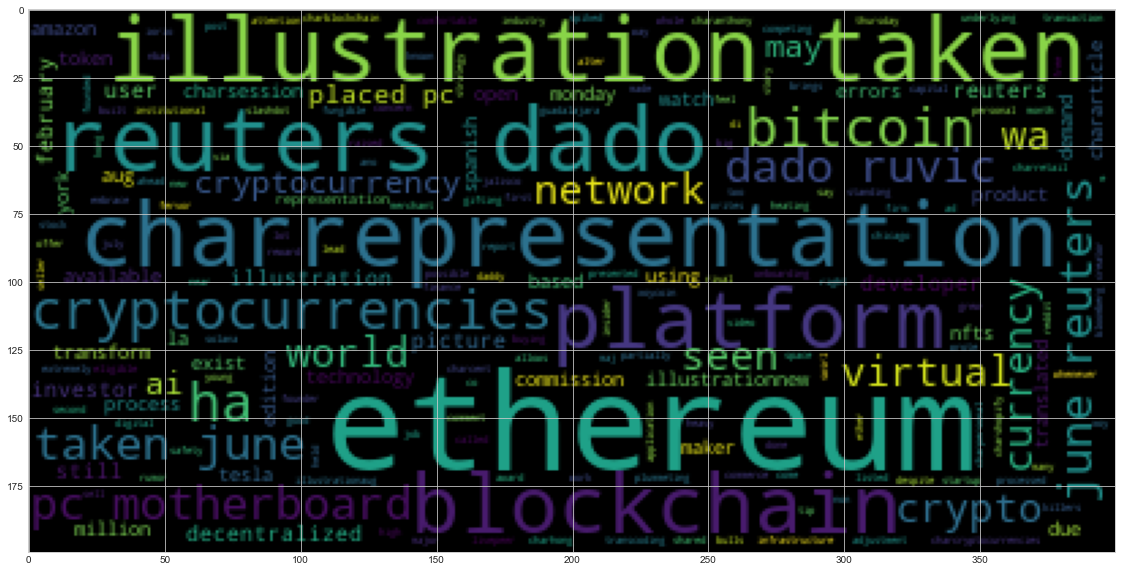

In [19]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
tokenized_eth_list = []
for eth_tokens in eth_sentiment_df['tokens']:
    tokenized_eth_list.append(" ".join(eth_tokens))
text = ""
for i in tokenized_eth_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---